In [1]:
import setGPU

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

from feature_eng import *

from predict import *

setGPU: Setting GPU to: 1


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

In [2]:
test_data_path = '../data/sci_tvt/test'
model_path = '../model/class_model.h5'

In [3]:
model = tf.keras.models.load_model(model_path)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(192, 192)
(192, 192, 1)


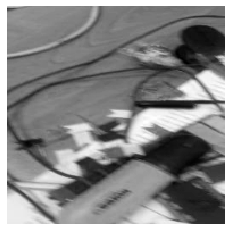

In [4]:
""" test with a single image"""
file_path = '../data/sci_tvt/test/NO_VISIBILITY/GICSD_8_7_213_SC.png'
img = get_single_channel_image(file_path)
print(img.shape)
ex_img = np.expand_dims(img, axis=-1)
print(ex_img.shape)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [6]:
norm_img = ex_img*(1./255)
ex_dim_img = np.expand_dims(norm_img, axis=0)
predictions = model.predict(ex_dim_img)
predictions

array([[0.000001, 0.999994, 0.000005]], dtype=float32)

In [7]:
test_data_path = '../data/sci_tvt/test'
test_data = load_test_data(test_data_path)
testImages = np.array([i[0] for i in test_data])
testLabels = np.array([i[1] for i in test_data])

In [8]:
predictions = model.predict(testImages)
print(testLabels.shape, predictions.shape)

(1516, 3) (1516, 3)


In [9]:
max_pred = np.argmax(predictions, axis=1)
max_gt = np.argmax(testLabels, axis=1)

print(max_pred.shape, max_gt.shape)

(1516,) (1516,)


In [10]:
cm_arr = confusion_matrix(max_gt, max_pred)
print(cm_arr)

[[491   0  25]
 [  1 529  28]
 [ 84   2 356]]


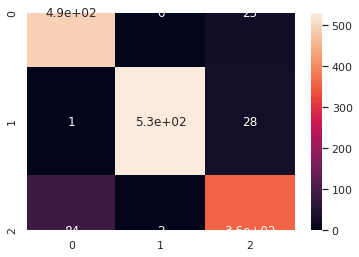

In [11]:
df_cm = pd.DataFrame(cm_arr, range(3), range(3))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size

plt.show()

In [12]:
acc = (cm_arr[0][0] + cm_arr[1][1] + cm_arr[2][2])/max_gt.shape[0]
acc

0.9076517150395779

In [13]:
""" test the predictions api from predict.py """
file_path = '../data/sci_tvt/test/NO_VISIBILITY/GICSD_8_7_213_SC.png'

predictions = predict_from_file(file_path)
print(predictions)

[[0.000006 0.999531 0.000463]]
